In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML

# The Steps involved in solving a problem with machine learning techniques


 ### 1. Data Preprocessing
 ### 2. Define "error"
 ### 3. Split the data into two parts: Training data and Testing data
 ### 4. Train the model: This step involves "learning" the target function from the given training data. Choose the     appropriate Machine Learning Algorithm for the problem. Train it on the data. Test the model with the training data.
 ### 5. Prediction: Obtain the predicted values from the given input and vizualize the results.

# Step-1: Data Preprocessing

In [44]:
#load the dataset
boston=load_boston()

#Description of the dataset
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [42]:
#Put the data into pandas DataFrames
features = pd.DataFrame(boston.data,columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
target=pd.DataFrame(boston.target,columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [5]:
max(target['target'])

50.0

In [6]:
min(target['target'])

5.0

In [7]:
# Concatenate features and target into a single DataFrame
#axis = 1 makes it concatenate columnwise
df=pd.concat([features,target],axis=1)
df
    

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Use Describe to generate a Summary of the dataset

### The describe() method computes the following parameters for each column

* count - Number of rows
* mean - Mean of the column
* std - Standard Deviation of the column
* min - minimum value in the column
* max - maximum value in the column
* 25% - 25 percentile
* 50% - 50 percentile
* 75% - 75 percentile

### Percentile -  A percentile( or a centile) is measure used in statistics indicating the values below which a given percentage of observations in a group of observation falls.

In [8]:
# use round(decimals=2) to set the precision to 2 decimal places
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


# Step-2: Data Visualization


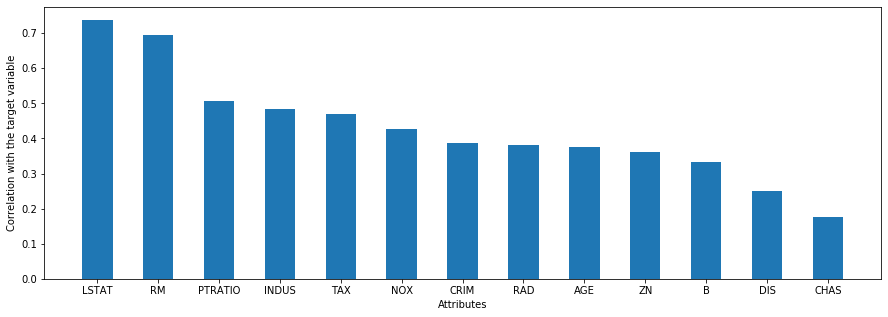

In [9]:
# Calculate correlation between every column on the data
corr=df.corr('pearson')

# Take absolute values of correlations
corrs = [abs(corr[attr]['target']) for attr in list(features)]

# Make a List of pair [(corr, feature)]
l = list(zip(corrs, list(features)))

#Sort the list of pairs in reverse/desecending order.
#with the correlation value as the key for sorting
l.sort(key=lambda x : x[0], reverse=True)
# "Unzip" pairs to two lists
# zip(*l) . takes a list that looks like [[a,b,c,d], [d,e,f], [g,h,i]]
# and returns [[a,d,g], [b,e,h], [c,f,i]]
corrs, labels = list(zip((*l)))

# Plot correlations with respect to the target variable as a bar graph
index = np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index, corrs, width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with the target variable')
plt.xticks(index, labels)
plt.show()

# We Observe from the bar graph generated above, that LSTAT and RM have the two highest absolute correlation values




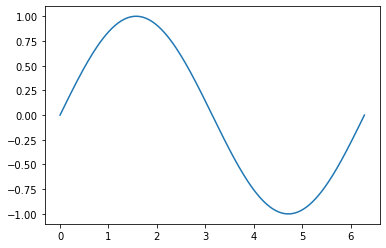

In [10]:
n=200
x=np.linspace(0,2*np.pi,n)
sine_values=np.sin(x)

#Plot the sin wave
plt.plot(x,sine_values)

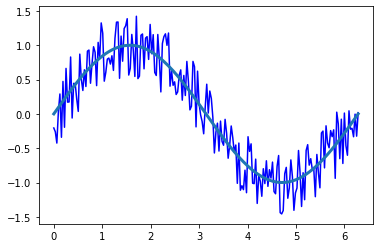

In [11]:
#Add some noise to the sine wave
noise=0.5
noisy_sine_values = sine_values + np.random.uniform(-noise,noise,n)

#Plot the noise values
plt.plot(x,noisy_sine_values,color='b')
plt.plot(x,sine_values,linewidth=3)

In [12]:
# Calculate MSE using the equation
error_value = (1/n)*sum(np.power(sine_values - noisy_sine_values,2))
error_value

0.08021204158829143

In [13]:
# Calculate mean squared error using the function from the sklearn library
mean_squared_error(sine_values, noisy_sine_values)

0.08021204158829143

In [14]:
def error(m,x,c,t):
    N=x.size
    e=sum(((m*x+c)-t)**2)
    return e*1/(2*N)

# Step -3: Normalize the data

### Normalize the data with MinMaxScaler

In [15]:
X=df['LSTAT'].values
Y=df['target'].values

In [16]:
# Before Normalization
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [17]:
x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X=X[:,-1]
y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]

In [18]:
# After Normalization
print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


# Three Fuctions that constitutes the model are:
 1.error: This function returns the mean squared error in the predictions values for the given m and c.
 
 2.update: This function changes the values of m and c.
 
 3.gradient_descent: This function implemnets the gradient descent.
    
Error: This function gives the error. Our objective is to minimize the quantity over the course of training.
                         squared error = 
    
    

In [19]:
def error(m,x,c,t):
    N=x.size
    e=sum(((m*x+c)-t)**2)
    return e*1/(2*N)

In [20]:
# 0.2 indicates 20% of the data is randomly sampled as testing data
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2)

In [21]:
def update(m,x,c,t,learning_rate):
    grad_m = sum(2*((m*x+c)-t)*x)
    grad_c= sum(2*((m*x+c)-t))
    m=m-grad_m*learning_rate
    c=c-grad_c*learning_rate
    return m,c

In [22]:
def gradient_descent(init_m, init_c,x,t,learning_rate, iterations,error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m,x,c,t)
        if e < error_threshold:
            print('Error less than the threshold. Stopping gradient descent')
            break
        error_values.append(e)
        m, c = update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c,error_values, mc_values


In [23]:
%%time
init_m=0.9
init_c=0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001


m,c,error_values, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations, error_threshold)

Wall time: 145 ms


In [24]:
# Calculate the predictions on the test set as a vectorized operation
predicted=(m*xtest)+c

In [25]:
# Compute MSE for the predicted values on the testing set
mean_squared_error(ytest, predicted)

0.022066904592206563

In [26]:
# Put xtest. ytest and predicted values into a single Dataframe so that we 
# can see the predicted values alongside the testing set
p = pd.DataFrame(list(zip(xtest, ytest, predicted)), columns=['x','target y', 'predicted'])
p.head()

,x,target y,predicted
0,0.170254,0.368889,0.486709
1,0.099338,0.542222,0.540327
2,0.204470,0.368889,0.460839
3,0.425497,0.311111,0.293725
4,0.972682,0.044444,-0.119990


# Visualization of learning process

1. Plot the regression line against the training data set to visualize what the line looks like for the training data set.
2. Plot the error vaules. This graph will show you how the error drops over time.
3. Plot the change in regression line throughout the training process: This graph helps you how to visualize m and c values update after each step.
    
    
    
   # Plotting the regression line upon the training the data set

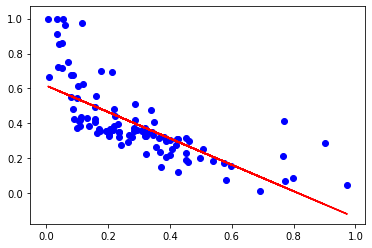

In [27]:
plt.scatter(xtest, ytest, color='b')
plt.plot(xtest, predicted, color='r')

In [28]:
# Reshape to change the shape that is required by the scaler
predicted = np.array(predicted).reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytest = ytest.reshape(-1,1)
xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_scaled = y_scaler.inverse_transform(predicted)

# This is to remove the extra dimension
xtest_scaled = xtest_scaled[:,-1]
ytest_scaled = ytest_scaled[:,-1]
predicted_scaled = predicted_scaled[:,-1]
p=pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)), columns = ['x','target_y','predicted_y'])
p=p.round(decimals=2)
p.head()

,x,target_y,predicted_y
0,7.90,21.6,26.90
1,5.33,29.4,29.31
2,9.14,21.6,25.74
3,17.15,19.0,18.22
4,36.98,7.0,-0.40


In [29]:
X=df['RM'].values
Y=df['target'].values

In [30]:
#Before Normalization
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [31]:
x_scaler = MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X=X[:,-1]
y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]

In [32]:
# After normalization
print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


# Step-4: Splitting the Dataset

In [33]:
#0.2 indicates 20% of the data is randomly sampled as testing data
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2)

In [34]:
# The terms error, loss or cost may be interchangeably by different author/blogs/
# descibe the function
def eror(m,x,c,t):
    N = x.size
    e=sum(((m*x+c)-t)**2)
    return e*1/(2*N)

# Equations of Update Weights

In [35]:
def update(m,x,c,t,learning_rate):
    grad_m = sum(2*((m*x+c)-t)*x)
    grad_c= sum(2*((m*x+c)-t))
    m=m-grad_m*learning_rate
    c=c-grad_c*learning_rate
    return m,c

# Error threshold: 
### If the error falls below the threshold, the gradient descent process is shopped and the weights are returned

In [36]:
def gradient_descent(init_m, init_c,x,t,learning_rate, iterations,error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m,x,c,t)
        if e < error_threshold:
            print('Error less than the threshold. Stopping gradient descent')
            break
        error_values.append(e)
        m, c = update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c,error_values, mc_values


# The parameters may be changed to varied to observe the computation vs accuracy tradeoffs.
* Learning Rate: Increasing the learing rate reduces the convergence time. But, if the learning rate is too high the model will overshoot the minima.
* Iterations: Number of iterations must be large enough to allow the mosel to converge to a minima, but if it is too large, then the model becomes too specific to the training data thus causing ovefitting. i.e.the model "memorizes " the data instead of "learning" the data.
  For this dataset,if you set the learning rate above 0.0025, it causes overflow. Reduce the learning rates and observe the error values. 
* Error threshold: This value can be set to a maximum value of error that is acceptable. When the error value goes below the threshold, the gradient descent is stopped.
* Initial Values: For this problem where our objective is to determine the line which gives the least error. It does not matter what intial values you provide. But, for non convex optimization problems, initial values affect the learning process. We will ellaborate on this when we learn neural networks.   

In [37]:
%%time
init_m=0.9
init_c=0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001


m,c,error_values, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations, error_threshold)

Wall time: 330 ms


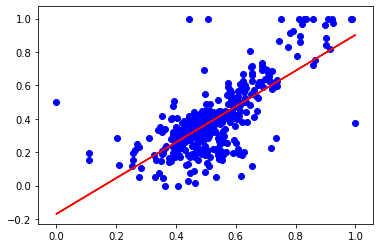

In [38]:
plt.scatter(xtrain, ytrain, color='b')
plt.plot(xtrain, (m*xtrain + c), color='r')

# Plotting the Error Values

Text(0.5, 0, 'Iterations')

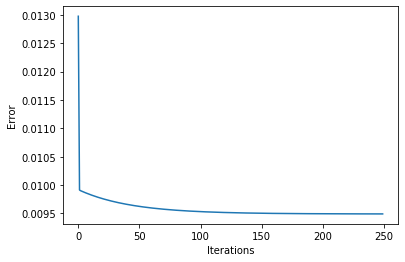

In [39]:
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

# Animation might take a minute or more to get processed.

### Therefore select every 5th value ( or a larger interval if you wish) to reduce the processing time 

# Step-5: Model Training Visualization

In [40]:
# As per the number of iterations increases, changes in the line are less noticable.
# Inorder to reduce the processing time for the animation. It is advised to choose small values
mc_values_anim=mc_values[0:250:5]

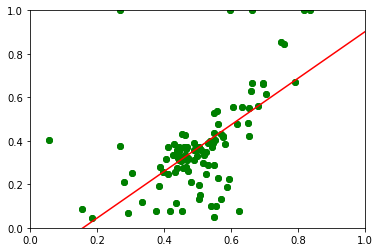

In [41]:
fig, ax=plt.subplots()
ln, =plt.plot([],[],'ro-',animated=True) 

def init():
    plt.scatter(xtest, ytest, color='g')
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln,

def update_frame(frame):
    m,c=mc_values_anim[frame]
    x1,y1=-0.5, m*-.5+c
    x2,y2=1.5, m*1.5+c
    ln.set_data([x1,x2], [y1,y2])
    return ln,

anim = FuncAnimation(fig, update_frame, frames=range(len(mc_values_anim)),init_func=init,blit=False)
HTML(anim.to_jshtml())